In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (18,6))

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 1800x600 with 0 Axes>

In [4]:
path_to_folder = "/content/drive/MyDrive/A.I./BDC/ml-1m"

In [5]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=581d905b7dbed39e916a5fa6f6e393ec0e7b49fad7b2780585365751190706dd
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [6]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

In [7]:
spark = SparkSession.builder.appName("ok").getOrCreate()

In [8]:
spark

In [9]:
df_movies = spark.read.option("delimiter", "::").csv("/content/drive/MyDrive/A.I./BDC/ml-1m/movies.dat", header = False)
df_movies = df_movies.selectExpr("_c0 as MovieID", "_c1 as Movie", "_c2 as Genre")
df_movies.show()

+-------+--------------------+--------------------+
|MovieID|               Movie|               Genre|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Animation|Childre...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|        Comedy|Drama|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|Adventure|Children's|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Animation|Children's|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|      Drama|Thriller|
|     17|Sen

In [10]:
df_ratings = spark.read.option("delimiter", "::").csv("/content/drive/MyDrive/A.I./BDC/ml-1m/ratings.dat")
df_ratings = df_ratings.selectExpr("_c0 as UserID", "_c1 as MovieID", "_c2 as Rating", "_c3 as Timestamp")
df_ratings.show()

+------+-------+------+---------+
|UserID|MovieID|Rating|Timestamp|
+------+-------+------+---------+
|     1|   1193|     5|978300760|
|     1|    661|     3|978302109|
|     1|    914|     3|978301968|
|     1|   3408|     4|978300275|
|     1|   2355|     5|978824291|
|     1|   1197|     3|978302268|
|     1|   1287|     5|978302039|
|     1|   2804|     5|978300719|
|     1|    594|     4|978302268|
|     1|    919|     4|978301368|
|     1|    595|     5|978824268|
|     1|    938|     4|978301752|
|     1|   2398|     4|978302281|
|     1|   2918|     4|978302124|
|     1|   1035|     5|978301753|
|     1|   2791|     4|978302188|
|     1|   2687|     3|978824268|
|     1|   2018|     4|978301777|
|     1|   3105|     5|978301713|
|     1|   2797|     4|978302039|
+------+-------+------+---------+
only showing top 20 rows



In [11]:
df_users = spark.read.option("delimiter", "::").csv("/content/drive/MyDrive/A.I./BDC/ml-1m/users.dat")
df_users = df_users.selectExpr("_c0 as UserID", "_c1 as Gender", "_c2 as Age", "_c3 as Occupation", "_c4 as Zipcode")
df_users.show()

+------+------+---+----------+-------+
|UserID|Gender|Age|Occupation|Zipcode|
+------+------+---+----------+-------+
|     1|     F|  1|        10|  48067|
|     2|     M| 56|        16|  70072|
|     3|     M| 25|        15|  55117|
|     4|     M| 45|         7|  02460|
|     5|     M| 25|        20|  55455|
|     6|     F| 50|         9|  55117|
|     7|     M| 35|         1|  06810|
|     8|     M| 25|        12|  11413|
|     9|     M| 25|        17|  61614|
|    10|     F| 35|         1|  95370|
|    11|     F| 25|         1|  04093|
|    12|     M| 25|        12|  32793|
|    13|     M| 45|         1|  93304|
|    14|     M| 35|         0|  60126|
|    15|     M| 25|         7|  22903|
|    16|     F| 35|         0|  20670|
|    17|     M| 50|         1|  95350|
|    18|     F| 18|         3|  95825|
|    19|     M|  1|        10|  48073|
|    20|     M| 25|        14|  55113|
+------+------+---+----------+-------+
only showing top 20 rows



# Handle dataset

# EDA

In [12]:
print("Shape of movies:", df_movies.count())
print("Shape of ratings:", df_ratings.count())
print("Shape of users:", df_users.count())

Shape of movies: 3883
Shape of ratings: 1000209
Shape of users: 6040


Some movies have remastered version.

## NAN

In [13]:
nan_check = df_movies.select([f.count(f.when(f.isnan(c) | (f.col(c).isNull()), c)).alias(c) for c in df_movies.columns])
nan_check.show()

+-------+-----+-----+
|MovieID|Movie|Genre|
+-------+-----+-----+
|      0|    0|    0|
+-------+-----+-----+



In [14]:
nan_check = df_users.select([f.count(f.when(f.isnan(c) | (f.col(c).isNull()), c)).alias(c) for c in df_users.columns])
nan_check.show()

+------+------+---+----------+-------+
|UserID|Gender|Age|Occupation|Zipcode|
+------+------+---+----------+-------+
|     0|     0|  0|         0|      0|
+------+------+---+----------+-------+



In [15]:
nan_check = df_ratings.select([f.count(f.when(f.isnan(c) | (f.col(c).isNull()), c)).alias(c) for c in df_ratings.columns])
nan_check.show()

+------+-------+------+---------+
|UserID|MovieID|Rating|Timestamp|
+------+-------+------+---------+
|     0|      0|     0|        0|
+------+-------+------+---------+



In [25]:
df = df_movies.join(df_ratings, on = "MovieID", how="inner")
df = df.join(df_users, on = "UserID", how = "inner")
df = df.drop("Timestamp")
df = df.drop("Zipcode")
df.show()

+------+-------+--------------------+--------------------+------+------+---+----------+
|UserID|MovieID|               Movie|               Genre|Rating|Gender|Age|Occupation|
+------+-------+--------------------+--------------------+------+------+---+----------+
|     1|   1193|One Flew Over the...|               Drama|     5|     F|  1|        10|
|     1|    661|James and the Gia...|Animation|Childre...|     3|     F|  1|        10|
|     1|    914| My Fair Lady (1964)|     Musical|Romance|     3|     F|  1|        10|
|     1|   3408|Erin Brockovich (...|               Drama|     4|     F|  1|        10|
|     1|   2355|Bug's Life, A (1998)|Animation|Childre...|     5|     F|  1|        10|
|     1|   1197|Princess Bride, T...|Action|Adventure|...|     3|     F|  1|        10|
|     1|   1287|      Ben-Hur (1959)|Action|Adventure|...|     5|     F|  1|        10|
|     1|   2804|Christmas Story, ...|        Comedy|Drama|     5|     F|  1|        10|
|     1|    594|Snow White and t

In [17]:
print("Shape of master df:", df.count())

Shape of master df: 1000209


+------+------+
|Rating| count|
+------+------+
|     1| 56174|
|     2|107557|
|     3|261197|
|     4|348971|
|     5|226310|
+------+------+



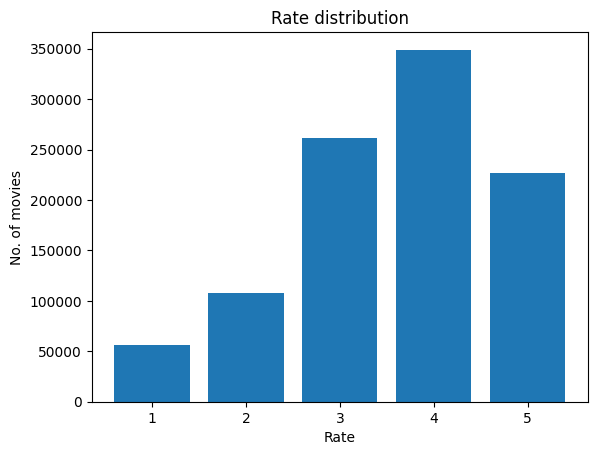

In [23]:
ratings = df.groupBy("Rating").count()
ratings = ratings.orderBy(f.col("Rating").asc())
ratings.show()

ratings = ratings.toPandas()
plt.bar(ratings["Rating"], ratings["count"])
plt.title('Rate distribution')
plt.xlabel('Rate')
plt.ylabel ('No. of movies')
plt.show()

+---+------+
|Age| count|
+---+------+
|  1| 27211|
| 18|183536|
| 25|395556|
| 35|199003|
| 45| 83633|
| 50| 72490|
| 56| 38780|
+---+------+



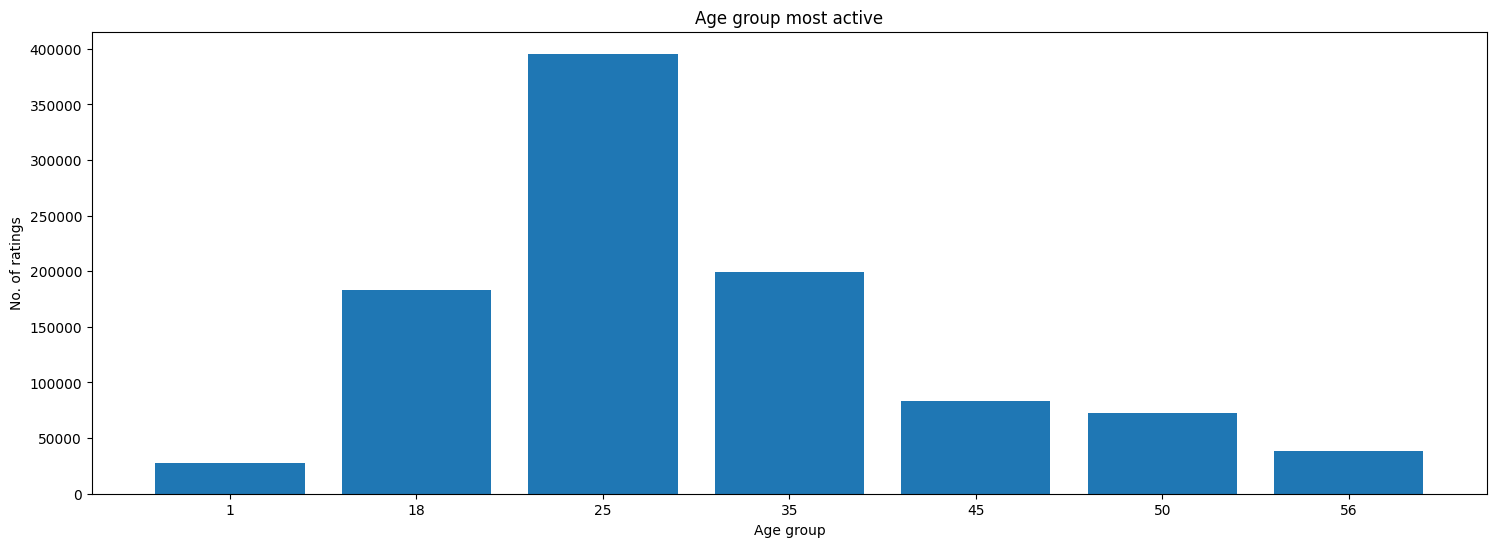

In [24]:
ages = df.groupBy("Age").count()
ages = ages.orderBy(f.col("Age").asc())
ages.show()
ages = ages.toPandas()

plt.figure(figsize = (18, 6))
plt.bar(ages["Age"], ages["count"])
plt.ylabel("No. of ratings")
plt.xlabel("Age group")
plt.title("Age group most active")
plt.show()

In [47]:
genre_favor = df.groupBy("Genre").pivot("Age").count().na.fill(0)

print("Age group 1")
genre_favor = genre_favor.orderBy(f.col("1").desc())
genre_favor.show(n= 5, truncate = False)

print("Age group 18")
genre_favor = genre_favor.orderBy(f.col("18").desc())
genre_favor.show(n= 5, truncate = False)

print("Age group 25")
genre_favor = genre_favor.orderBy(f.col("25").desc())
genre_favor.show(n= 5, truncate = False)

print("Age group 35")
genre_favor = genre_favor.orderBy(f.col("35").desc())
genre_favor.show(n= 5, truncate = False)

# genre_favor = genre_favor.orderBy(f.col("45").desc())
# genre_favor.show(n= 5, truncate = False)

# genre_favor = genre_favor.orderBy(f.col("50").desc())
# genre_favor.show(n= 5, truncate = False)

# genre_favor = genre_favor.orderBy(f.col("65").desc())
# genre_favor.show(n= 5, truncate = False)

Age group 1
+---------------+----+-----+-----+-----+-----+----+----+
|Genre          |1   |18   |25   |35   |45   |50  |56  |
+---------------+----+-----+-----+-----+-----+----+----+
|Comedy         |3703|24204|48444|21868|8351 |6759|3554|
|Drama          |2239|17678|42834|22442|10439|9706|6085|
|Comedy|Romance |1219|7940 |16814|8207 |3770 |3108|1654|
|Comedy|Drama   |1000|7649 |17257|8148 |3447 |3042|1702|
|Action|Thriller|745 |5632 |11359|4925 |1748 |1622|728 |
+---------------+----+-----+-----+-----+-----+----+----+
only showing top 5 rows

Age group 18
+---------------+----+-----+-----+-----+-----+----+----+
|Genre          |1   |18   |25   |35   |45   |50  |56  |
+---------------+----+-----+-----+-----+-----+----+----+
|Comedy         |3703|24204|48444|21868|8351 |6759|3554|
|Drama          |2239|17678|42834|22442|10439|9706|6085|
|Comedy|Romance |1219|7940 |16814|8207 |3770 |3108|1654|
|Comedy|Drama   |1000|7649 |17257|8148 |3447 |3042|1702|
|Action|Thriller|745 |5632 |11359|4925

Comedy and drama genres are the dominance, favor of all generations.

<ipython-input-210-74b67c152104>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


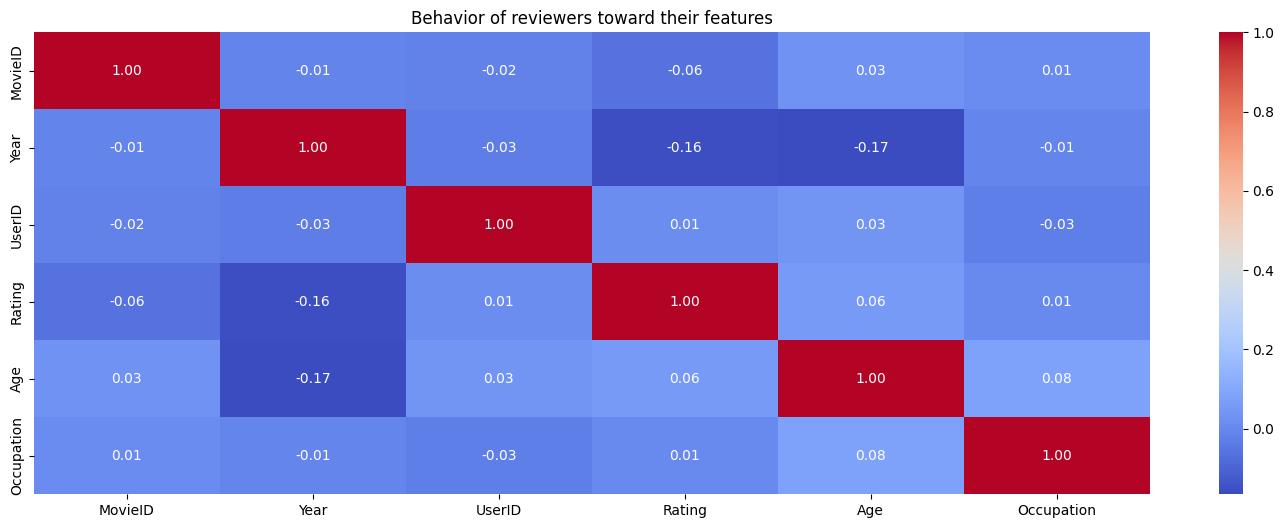

In [ ]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(18, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Behavior of reviewers toward their features")
plt.show()

In [29]:
most_active_ratings = df.groupBy("Movie").count().orderBy(f.col("count").desc())
most_active_ratings.show(truncate = False)

+-----------------------------------------------------+-----+
|Movie                                                |count|
+-----------------------------------------------------+-----+
|American Beauty (1999)                               |3428 |
|Star Wars: Episode IV - A New Hope (1977)            |2991 |
|Star Wars: Episode V - The Empire Strikes Back (1980)|2990 |
|Star Wars: Episode VI - Return of the Jedi (1983)    |2883 |
|Jurassic Park (1993)                                 |2672 |
|Saving Private Ryan (1998)                           |2653 |
|Terminator 2: Judgment Day (1991)                    |2649 |
|Matrix, The (1999)                                   |2590 |
|Back to the Future (1985)                            |2583 |
|Silence of the Lambs, The (1991)                     |2578 |
|Men in Black (1997)                                  |2538 |
|Raiders of the Lost Ark (1981)                       |2514 |
|Fargo (1996)                                         |2513 |
|Sixth S

In [34]:
most_positive_ratings = df.groupBy("Movie").agg(f.avg("Rating").alias("Mean rating"))
most_positive_ratings = most_positive_ratings.orderBy(f.col("Mean rating").desc())
most_positive_ratings.show(truncate=False)

+-------------------------------------------------------------------+-----------------+
|Movie                                                              |Mean rating      |
+-------------------------------------------------------------------+-----------------+
|Ulysses (Ulisse) (1954)                                            |5.0              |
|Gate of Heavenly Peace, The (1995)                                 |5.0              |
|Bittersweet Motel (2000)                                           |5.0              |
|Schlafes Bruder (Brother of Sleep) (1995)                          |5.0              |
|Baby, The (1973)                                                   |5.0              |
|Smashing Time (1967)                                               |5.0              |
|Follow the Bitch (1998)                                            |5.0              |
|Song of Freedom (1936)                                             |5.0              |
|Lured (1947)                   